### Importación de datos



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [7]:
def convertir_precio(df):
    df["Precio"] = pd.to_numeric(df["Precio"], errors="coerce")
    return df

tienda = convertir_precio(tienda)
tienda2 = convertir_precio(tienda2)
tienda3 = convertir_precio(tienda3)
tienda4 = convertir_precio(tienda4)

facturacion = {
    "Tienda 1": tienda["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}

print("Facturación total por tienda:")
for tienda_nombre, total in facturacion.items():
    print(f"{tienda_nombre}: ${total:,.0f}")

Facturación total por tienda:
Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


<ipython-input-8-44d79d6fc4b5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres_tiendas, y=ingresos, palette="viridis")


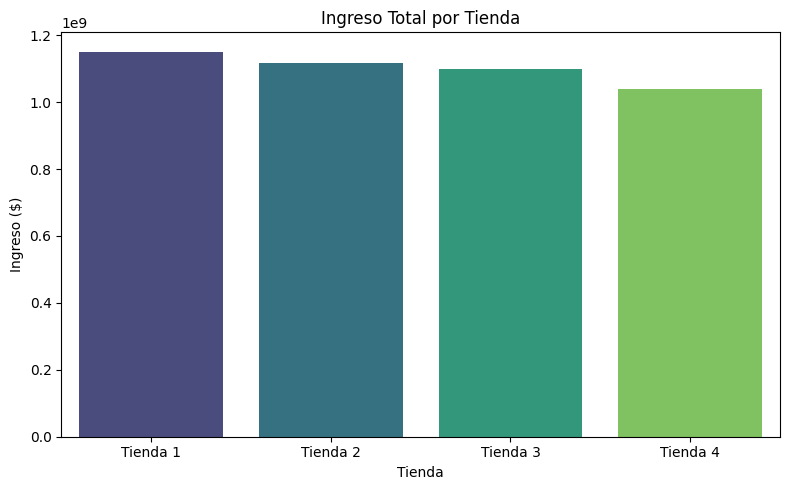

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
ingresos = [tienda["Precio"].sum(), tienda2["Precio"].sum(), tienda3["Precio"].sum(), tienda4["Precio"].sum()]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

plt.figure(figsize=(8,5))
sns.barplot(x=nombres_tiendas, y=ingresos, palette="viridis")
plt.title("Ingreso Total por Tienda")
plt.ylabel("Ingreso ($)")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [9]:
def ventas_por_categoria(df, nombre):
    print(f"\nVentas por categoría - {nombre}")
    print(df["Categoría del Producto"].value_counts())

ventas_por_categoria(tienda, "Tienda 1")
ventas_por_categoria(tienda2, "Tienda 2")
ventas_por_categoria(tienda3, "Tienda 3")
ventas_por_categoria(tienda4, "Tienda 4")


Ventas por categoría - Tienda 1
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Ventas por categoría - Tienda 2
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Ventas por categoría - Tienda 3
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

Ventas po

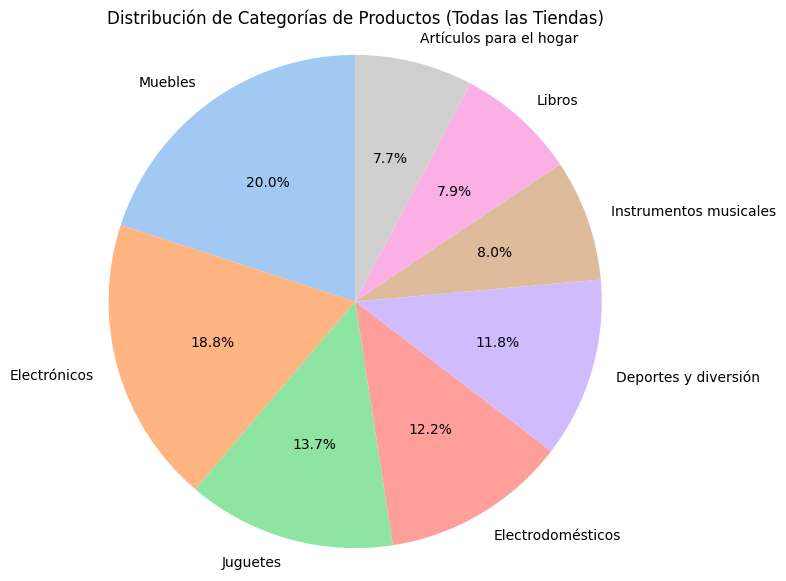

In [10]:
datos_combinados = pd.concat([tienda, tienda2, tienda3, tienda4])

categorias = datos_combinados["Categoría del Producto"].value_counts()

plt.figure(figsize=(7,7))
plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Distribución de Categorías de Productos (Todas las Tiendas)")
plt.axis('equal')
plt.show()

# 3. Calificación promedio de la tienda


In [11]:
calificaciones = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}

print("Calificación promedio por tienda:")
for tienda_nombre, promedio in calificaciones.items():
    print(f"{tienda_nombre}: {promedio:.2f}")

Calificación promedio por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


<ipython-input-12-350915388532>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=calificaciones, y=nombres_tiendas, palette="coolwarm")


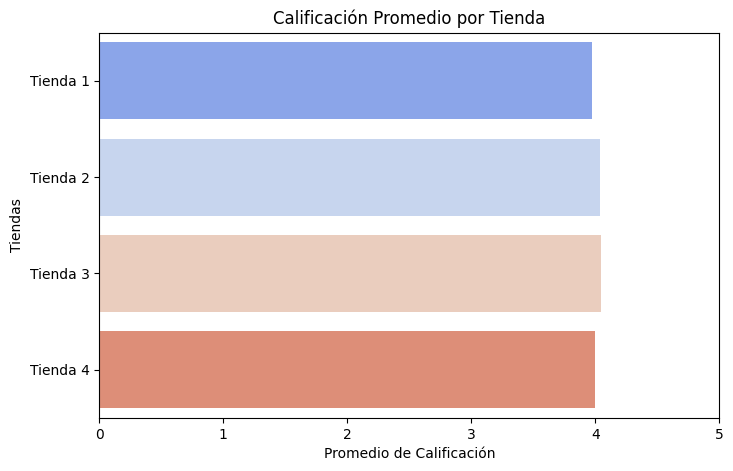

In [12]:
calificaciones = [
    tienda["Calificación"].mean(),
    tienda2["Calificación"].mean(),
    tienda3["Calificación"].mean(),
    tienda4["Calificación"].mean()
]

plt.figure(figsize=(8,5))
sns.barplot(x=calificaciones, y=nombres_tiendas, palette="coolwarm")
plt.title("Calificación Promedio por Tienda")
plt.xlabel("Promedio de Calificación")
plt.ylabel("Tiendas")
plt.xlim(0, 5)
plt.show()

# 4. Productos más y menos vendidos

In [13]:
def productos_extremos(df, nombre):
    conteo = df["Producto"].value_counts()
    mas_vendido = conteo.idxmax()
    menos_vendido = conteo.idxmin()
    print(f"\nProductos destacados - {nombre}")
    print(f"Más vendido: {mas_vendido}")
    print(f"Menos vendido: {menos_vendido}")

productos_extremos(tienda, "Tienda 1")
productos_extremos(tienda2, "Tienda 2")
productos_extremos(tienda3, "Tienda 3")
productos_extremos(tienda4, "Tienda 4")


Productos destacados - Tienda 1
Más vendido: Microondas
Menos vendido: Auriculares con micrófono

Productos destacados - Tienda 2
Más vendido: Iniciando en programación
Menos vendido: Juego de mesa

Productos destacados - Tienda 3
Más vendido: Kit de bancas
Menos vendido: Bloques de construcción

Productos destacados - Tienda 4
Más vendido: Cama box
Menos vendido: Guitarra eléctrica


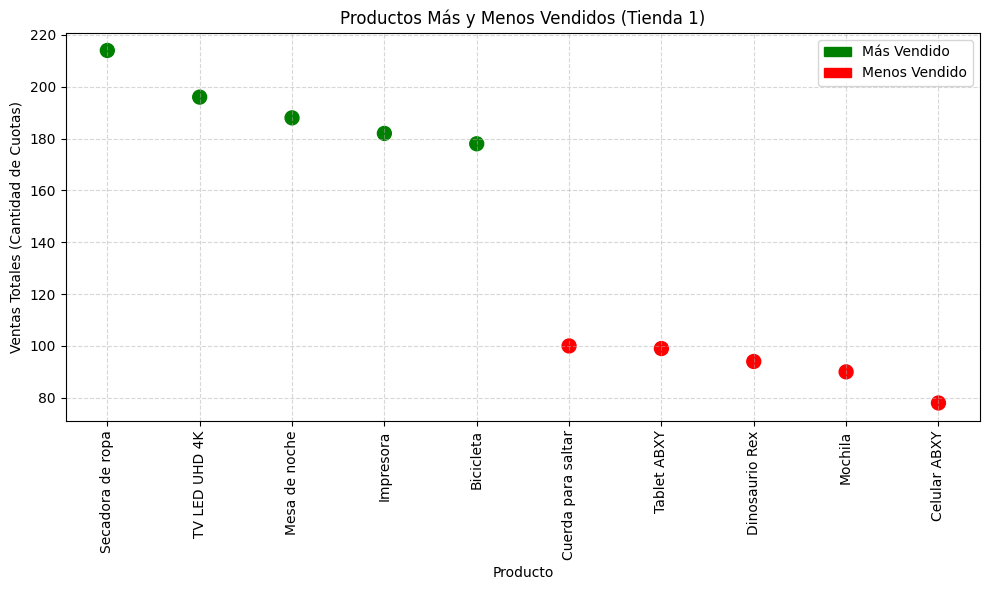

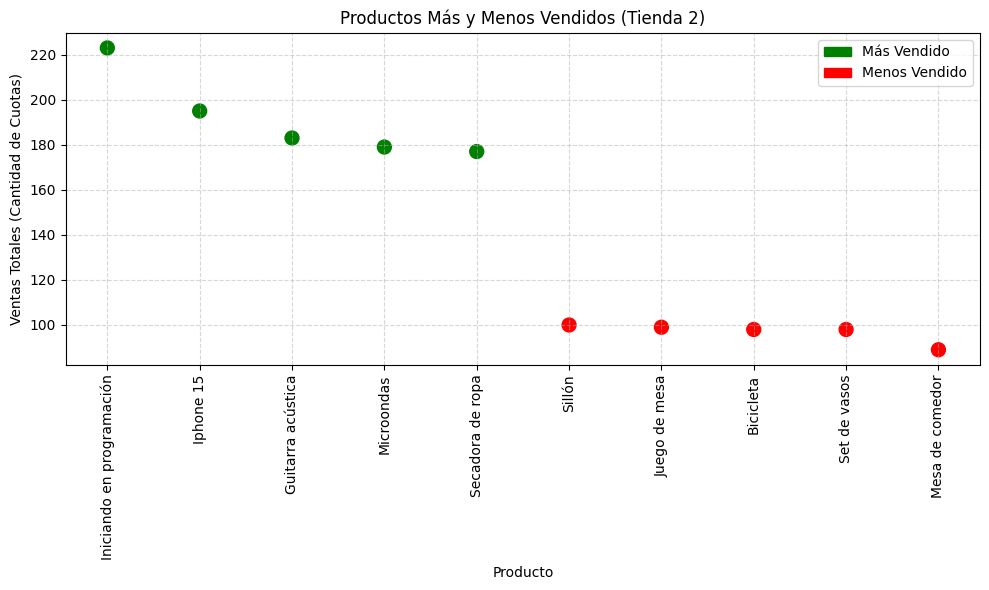

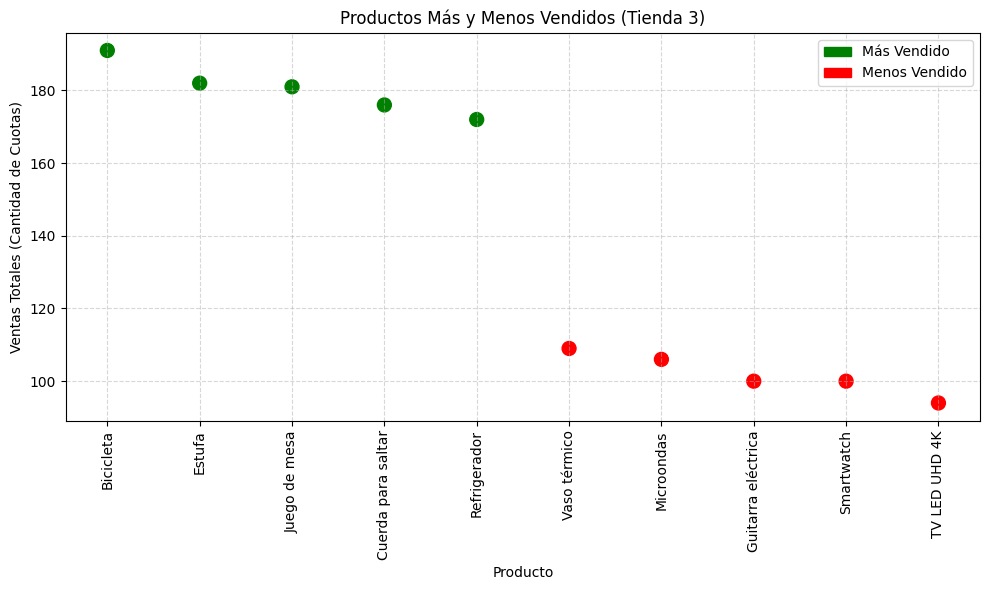

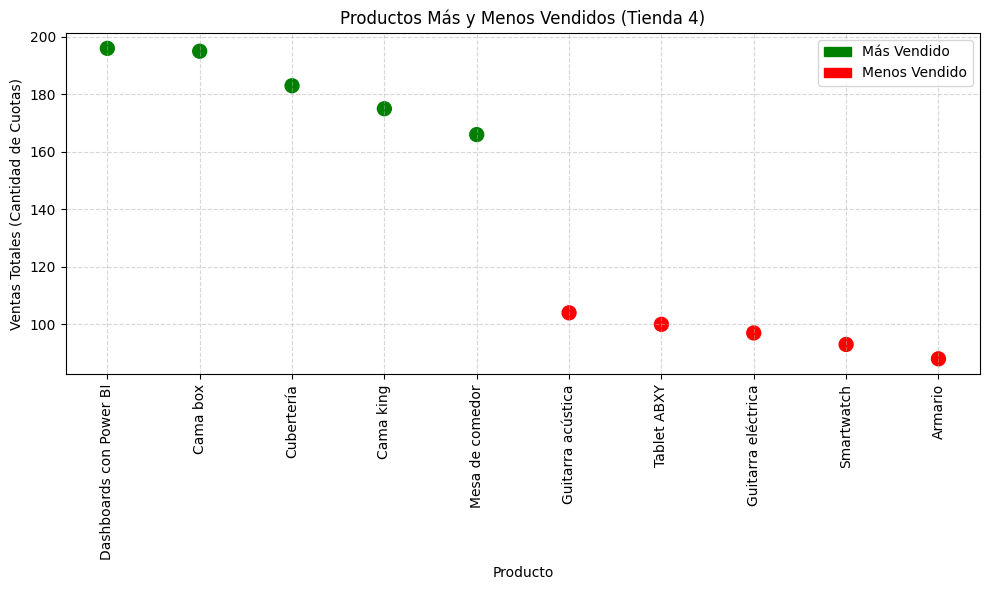

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def graficar_mas_menos_vendidos(tienda, nombre_tienda):
    productos_tienda = tienda.groupby("Producto")["Cantidad de cuotas"].sum()

    productos_ordenados_tienda = productos_tienda.sort_values(ascending=False)
    mas_vendidos = productos_ordenados_tienda.head(5)
    menos_vendidos = productos_ordenados_tienda.tail(5)

    productos = list(mas_vendidos.index) + list(menos_vendidos.index)
    ventas = list(mas_vendidos.values) + list(menos_vendidos.values)
    tipos = ['Más Vendido'] * len(mas_vendidos) + ['Menos Vendido'] * len(menos_vendidos)

    colores = ['green'] * len(mas_vendidos) + ['red'] * len(menos_vendidos)

    plt.figure(figsize=(10,6))
    plt.scatter(productos, ventas, c=colores, s=100)

    plt.title(f"Productos Más y Menos Vendidos ({nombre_tienda})")
    plt.xlabel("Producto")
    plt.ylabel("Ventas Totales (Cantidad de Cuotas)")
    plt.xticks(rotation=90)
    plt.grid(True, linestyle='--', alpha=0.5)

    mas_vendidos_patch = mpatches.Patch(color='green', label='Más Vendido')
    menos_vendidos_patch = mpatches.Patch(color='red', label='Menos Vendido')
    plt.legend(handles=[mas_vendidos_patch, menos_vendidos_patch])

    plt.tight_layout()
    plt.show()

graficar_mas_menos_vendidos(tienda, "Tienda 1")
graficar_mas_menos_vendidos(tienda2, "Tienda 2")
graficar_mas_menos_vendidos(tienda3, "Tienda 3")
graficar_mas_menos_vendidos(tienda4, "Tienda 4")

# 5. Envío promedio por tienda

In [15]:
envio_promedio = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

print("Costo de envío promedio por tienda:")
for tienda_nombre, promedio in envio_promedio.items():
    print(f"{tienda_nombre}: ${promedio:,.2f}")

Costo de envío promedio por tienda:
Tienda 1: $26,018.61
Tienda 2: $25,216.24
Tienda 3: $24,805.68
Tienda 4: $23,459.46


<ipython-input-16-8fafdd0fdb1a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres_tiendas, y=envio_promedio, palette="magma")


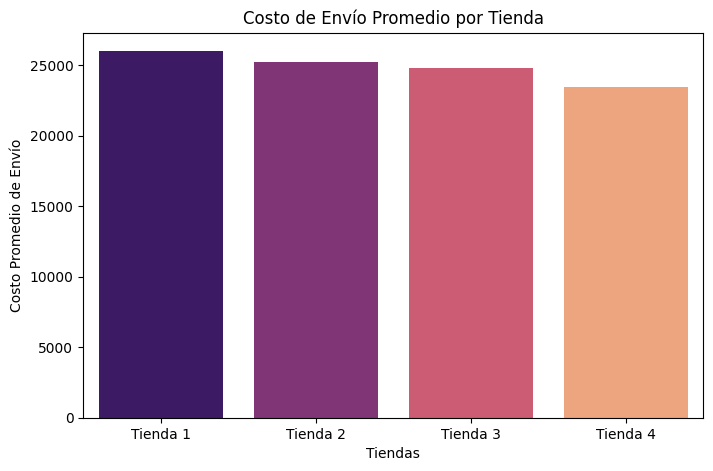

In [16]:
envio_promedio = [
    tienda["Costo de envío"].mean(),
    tienda2["Costo de envío"].mean(),
    tienda3["Costo de envío"].mean(),
    tienda4["Costo de envío"].mean()
]

plt.figure(figsize=(8,5))
sns.barplot(x=nombres_tiendas, y=envio_promedio, palette="magma")
plt.title("Costo de Envío Promedio por Tienda")
plt.ylabel("Costo Promedio de Envío")
plt.xlabel("Tiendas")
plt.show()

**INFORME FINAL**
Después de hacer un análisis exhaustivo sobre el rendimiento de las cuatro tiendas de Alura Store, se evaluaron varios aspectos clave para decidir cuál de ellas debería elegir el Sr. Juan para iniciar su nuevo negocio. Para esto, se consideraron variables como las ventas, las valoraciones de los clientes, los productos más populares y el comportamiento del costo promedio de envío.

Primero, al revisar los ingresos de cada tienda, se notaron diferencias que, aunque no son drásticas, son importantes para este tipo de decisiones. La tienda con mayores ingresos superó los 1.150 millones, mientras que la que menos vendió alcanzó poco más de 1.038 millones. Esta diferencia, aunque moderada, indica una tendencia clara sobre la eficiencia comercial de cada tienda.

Segundo, al analizar cómo los clientes valoran cada tienda, se observó que todas se mantienen en un rango similar, cerca de 4 puntos sobre 5. Sin embargo, la tienda con menores ingresos también fue la peor valorada, lo que refuerza su posición como la menos eficiente del grupo. Esta combinación de baja facturación y calificaciones un poco más bajas sugiere una posible debilidad en la experiencia del cliente o en la oferta de productos.

Otro aspecto importante fue el tipo de productos más vendidos en cada tienda. Mientras que algunas se destacan por vender artículos de alta rotación como bancos o ventiladores, en una de ellas los productos principales son camas, que, debido a su precio más alto y naturaleza más específica, podrían limitar la frecuencia de compra. Esto también podría estar afectando negativamente su volumen de ventas.

También en cuánto el costo promedio los envíos, la Tienda 4 tiene el costo de envío más bajo, pero esto no fue suficiente como para compensar su baja facturación o valoración de clientes.


Después de analizar todos estos datos, mi recomendación es que el Sr. Juan debería vender la Tienda 4. Es la tienda con menor facturación, peor valoración de clientes y productos que no se mueven tan fácilmente. Si bien los envíos son un poco más baratos, no alcanza para inclinar la balanza.Por otro lado, la Tienda 1 parece ser la más sólida, ya que tiene el mayor ingreso, productos que rotan bien y buena percepción de los clientes.


**EXTRA**  Análisis del desempeño geográfico

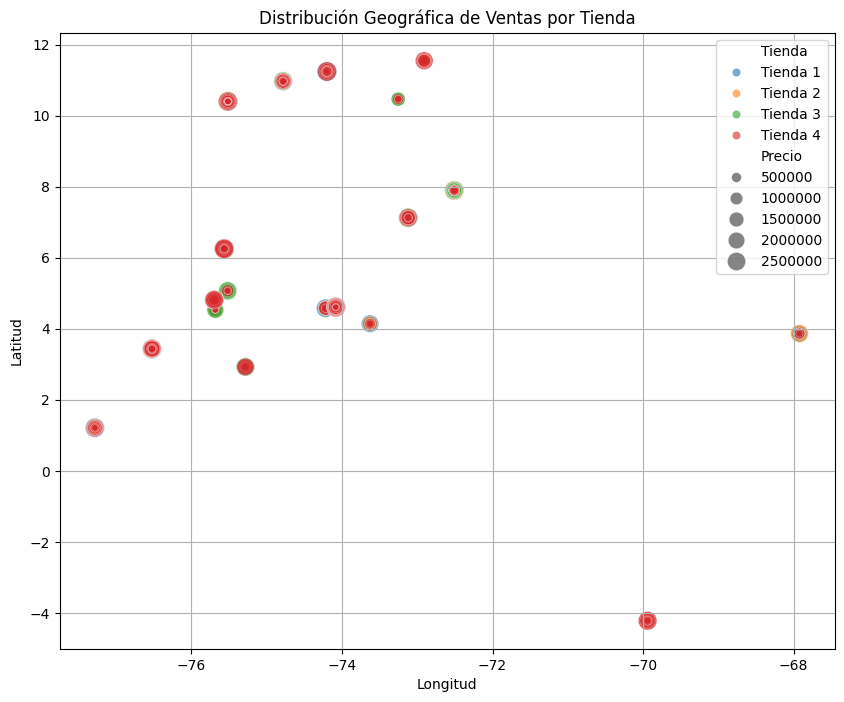

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Añadir columna con nombre de tienda
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Unir todas las tiendas
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Asegurar nombres correctos para latitud y longitud
df = df.rename(columns={"lat": "Latitud", "lon": "Longitud"})  # si los nombres no son así, ajustalos
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x="Longitud", y="Latitud",
    hue="Tienda",
    size="Precio",
    sizes=(20, 200),
    alpha=0.6
)
plt.title("Distribución Geográfica de Ventas por Tienda")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.legend()
plt.show()

Este análisis nos ha permitido investigar si hay patrones espaciales que podrían estar afectando el rendimiento de cada tienda y evaluar cuán eficaces son sus operaciones en el territorio.

Al observar la distribución, se nota que la Tienda 4 tiene una amplia cobertura geográfica, estando presente en casi todas las ubicaciones que se muestran. Sin embargo, a pesar de esta amplia presencia, sus ventas son bastante bajas, como lo indican los círculos pequeños en el gráfico. Esto refuerza la conclusión anterior de que, aunque la Tienda 4 tiene costos de envío más bajos, no logra convertir su alcance en ingresos significativos ni en una buena valoración por parte de los clientes. En otras palabras, su bajo rendimiento no se justifica ni siquiera por su mayor distribución espacial, lo que confirma su posición como la menos eficiente.

Por otro lado, la Tienda 1, que ya habíamos identificado como la más fuerte en términos de ingresos, valoración y rotación de productos, muestra en este análisis geográfico una distribución más concentrada. Sin embargo, los puntos donde está presente corresponden a ventas de mayor volumen. Esto sugiere una alta eficiencia comercial por ubicación: vende más con menos presencia geográfica.

En cuanto a las tiendas 2 y 3, su presencia geográfica y el volumen de ventas que se reflejan en el gráfico confirman su posición intermedia en el análisis anterior. No destacan ni por su cobertura ni por volúmenes altos de venta, lo que coincide con sus desempeños moderados tanto en ingresos como en valoración.
